<a href="https://colab.research.google.com/github/princeKike27/Khiron-Next-Buyers-FM/blob/main/Khiron_Next_Buyers_FM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Khiron Next Buyers

For this project ...

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data files

# sales df
df_sales = pd.read_csv(
    'https://raw.githubusercontent.com/princeKike27/Khiron-Next-Buyers-FM/main/Compras_FMs.csv',\
    sep=';')

# procedures df
df_procedures = pd.read_csv(
    'https://raw.githubusercontent.com/princeKike27/Khiron-Next-Buyers-FM/main/Procedimientos_FMs.csv',\
    sep=';')

In [3]:
# check procedures df
df_procedures.head()

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede
0,26720,41453437,30/09/1949,72,F,BOGOTÁ D.C.,(OSTEO)ARTROSIS PRIMARIAGENERALIZADA,M150,PLAN PARTICULAR,Particular,19/03/2020,19/03/2020,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
1,26793,13352962,10/11/1960,61,M,BOGOTÁ D.C.,"TRASTORNO DE DISCO LUMBAR YOTROS, CON RADICULO...",M511,PLAN PARTICULAR,Particular,19/03/2020,19/03/2020,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
2,26806,390646,1/08/1934,87,M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),G530,PLAN PARTICULAR,Particular,19/03/2020,19/03/2020,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
3,26928,19059029,13/09/1948,73,M,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,19/03/2020,19/03/2020,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA
4,26846,41595666,20/09/1953,68,F,CAJICÁ,NaN,NaN,PLAN PARTICULAR,Particular,19/03/2020,19/03/2020,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA


In [4]:
# check sales df
df_sales.head()

,ingreso,cedula,fecha_oc
0,26806,390646,19/03/2020
1,26793,13352962,19/03/2020
2,26928,19059029,19/03/2020
3,26891,31259698,19/03/2020
4,26720,41453437,19/03/2020


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Procedures FM

In [7]:
# procedures df
df_procedures.head()

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede
0,26720,41453437,30/09/1949,72,F,BOGOTÁ D.C.,(OSTEO)ARTROSIS PRIMARIAGENERALIZADA,M150,PLAN PARTICULAR,Particular,19/03/2020,19/03/2020,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
1,26793,13352962,10/11/1960,61,M,BOGOTÁ D.C.,"TRASTORNO DE DISCO LUMBAR YOTROS, CON RADICULO...",M511,PLAN PARTICULAR,Particular,19/03/2020,19/03/2020,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
2,26806,390646,1/08/1934,87,M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),G530,PLAN PARTICULAR,Particular,19/03/2020,19/03/2020,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
3,26928,19059029,13/09/1948,73,M,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,19/03/2020,19/03/2020,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA
4,26846,41595666,20/09/1953,68,F,CAJICÁ,NaN,NaN,PLAN PARTICULAR,Particular,19/03/2020,19/03/2020,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA


In [9]:
# check shape of df
df_procedures.shape

(35187, 19)

In [10]:
# check column types
df_procedures.dtypes

Ingreso               int64
DocPaciente          object
Fecha Nacimiento     object
Edad                  int64
Sexo                 object
CiudadMunicipio      object
Diagnostico          object
CodigoDiagnostico    object
Plan                 object
Tipo Plan            object
FechaIngreso         object
FechaFormulacion     object
CodProducto          object
Cantidad              int64
DocMedico             int64
NombreMedico         object
Especialidad         object
Plan/Servicio        object
Sede                 object
dtype: object

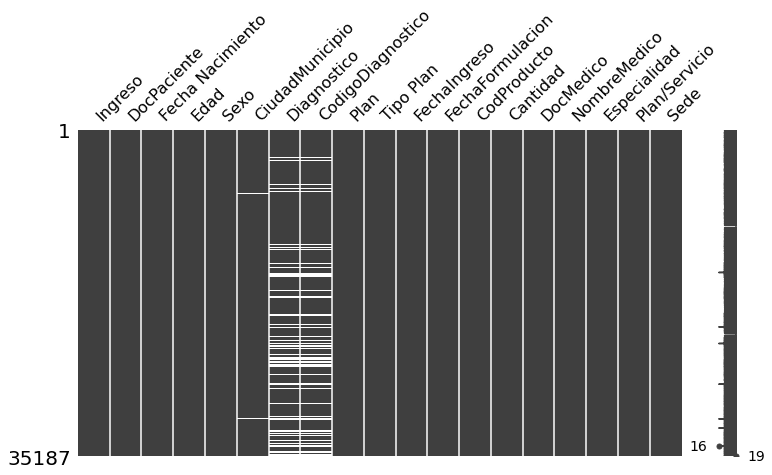

In [12]:
# check for missing values
import missingno as msg

msg.matrix(df_procedures, figsize=(12, 6))

In [14]:
# find number of missing values in 'Diagnostico'

na_diagnostic = df_procedures['Diagnostico'].isna().sum()
na_city = df_procedures['CiudadMunicipio'].isna().sum()

print(f'Missing Values in Diagnostico: {na_diagnostic}')
print(f'Missing values in CiudadMunicipio: {na_city}')

Missing Values in Diagnostico: 6426
Missing values in CiudadMunicipio: 20


In [17]:
# drop na values of CiudadMunicipio
df_procedures = df_procedures.dropna(subset=['CiudadMunicipio'])

# check shape
df_procedures.shape

(35167, 19)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### GroupBy of Relevant Features


In [30]:
# FM procedures by sede
fm_proced_sede = df_procedures.groupby(['Sede']).Cantidad.sum().reset_index()

fm_proced_sede['%_Prescripciones'] = (fm_proced_sede.Cantidad / fm_proced_sede.Cantidad.sum()) * 100
fm_proced_sede

,Sede,Cantidad,%_Prescripciones
0,COUNTRY,3952,8.328241
1,PARKWAY,922,1.942975
2,ZERENIA,41349,87.136746
3,ZERENIA - IBAGUE,106,0.223379
4,ZERENIA - MEDELLÍN,420,0.885086
5,ZERENIA - ARMENIA,61,0.128548
6,ZERENIA - BARRANQUILLA,89,0.187554
7,ZERENIA - BUCARAMANGA,177,0.373001
8,ZERENIA - CALI,256,0.539481
9,ZERENIA - MANIZALES,3,0.006322


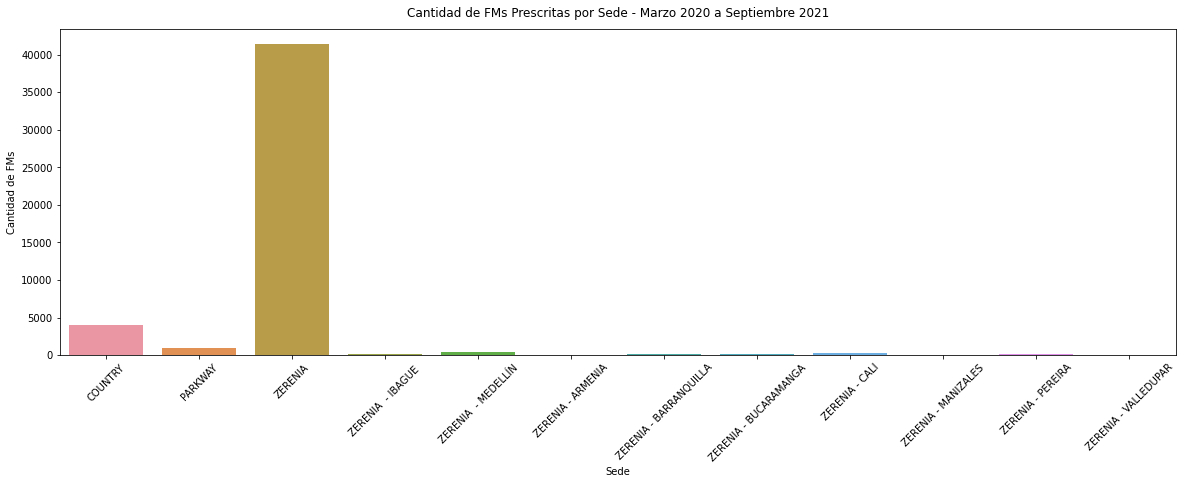

In [40]:
# barplot of prescribed FMs per Sede

f, ax = plt.subplots(figsize=(20,6))

sns.barplot(x=fm_proced_sede.Sede, y=fm_proced_sede.Cantidad)
# rotate x labels
plt.xticks(rotation=45)
plt.ylabel('Cantidad de FMs')

plt.title('Cantidad de FMs Prescritas por Sede - Marzo 2020 a Septiembre 2021', pad=12)
plt.show()

In [29]:
# FM procedures by sexo
fm_proced_sex = df_procedures.groupby(['Sexo']).Cantidad.sum().reset_index()

fm_proced_sex['%_Prescripciones'] = (fm_proced_sex.Cantidad / fm_proced_sex.Cantidad.sum()) * 100
fm_proced_sex

,Sexo,Cantidad,%_Prescripciones
0,F,33715,71.049249
1,I,1,0.002107
2,M,13737,28.948644


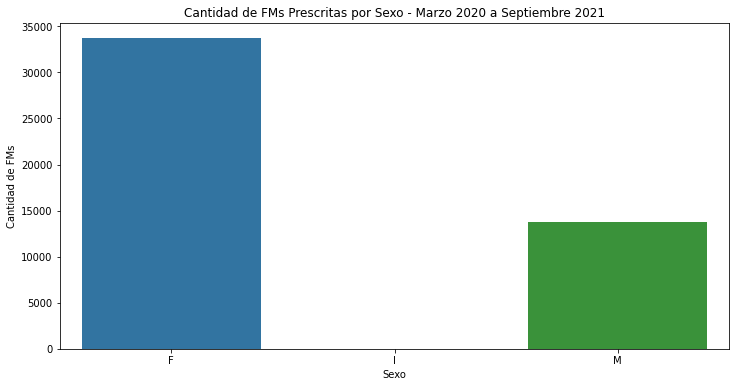

In [43]:
# barplot of prescribed FMs per Sexo

f, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=fm_proced_sex.Sexo, y=fm_proced_sex.Cantidad)
plt.ylabel('Cantidad de FMs')

plt.title('Cantidad de FMs Prescritas por Sexo - Marzo 2020 a Septiembre 2021')
plt.show()